<a href="https://colab.research.google.com/github/zainanizar/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install text-hammer

     |████████████████████████████████| 115 kB 30.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1_clean.csv')
df.head()

,Unnamed: 0,index,type,posts
0,0,0,INFJ,enfp intj moment sportscenter play prankswhat ...
1,1,1,ENTP,i find lack post alarmingsex boring position o...
2,2,2,INTP,good _ _ _ _ _ of course know blessing cursedo...
3,3,3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,4,4,ENTJ,you re firedthat silly misconception approach ...


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df=df.dropna()
df.reset_index(inplace=True)

In [ ]:

import text_hammer as th
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)
df = text_preprocessing(df,"posts")
x=df['posts']

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

In [ ]:


y = df.iloc[:,3].values
print(y)
le=LabelEncoder()
y=le.fit_transform(y)

y=to_categorical(y)

['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


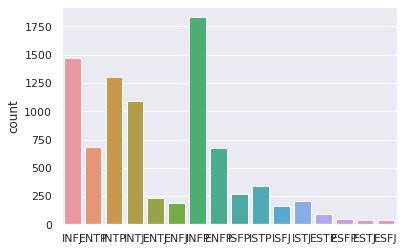

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.iloc[:,3].values)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

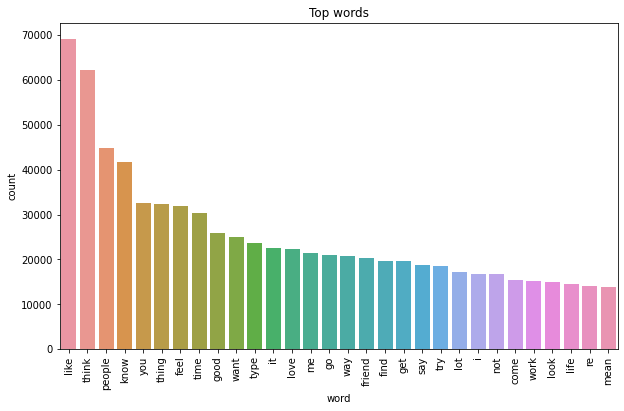

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
words_list = []
for post in df['posts']:
    words_list.extend(nltk.word_tokenize(post))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')

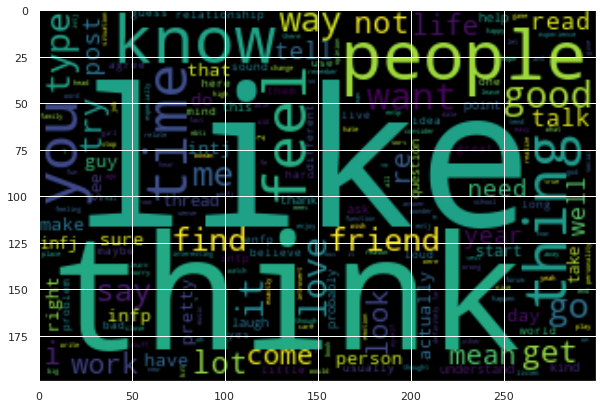

In [ ]:
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [ ]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()

,level_0,Unnamed: 0,index,type,posts,words_per_comment,variance_of_word_counts
0,0,0,0,INFJ,enfp intj moment sportscenter play prankswhat ...,5.64,0.0
1,1,1,1,ENTP,i find lack post alarmingsex boring position o...,8.92,0.0
2,2,2,2,INTP,good _ _ _ _ _ of course know blessing cursedo...,8.24,0.0
3,3,3,3,INTJ,dear intp enjoy conversation day esoteric gabb...,9.94,0.0
4,4,4,4,ENTJ,you re firedthat silly misconception approach ...,9.00,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

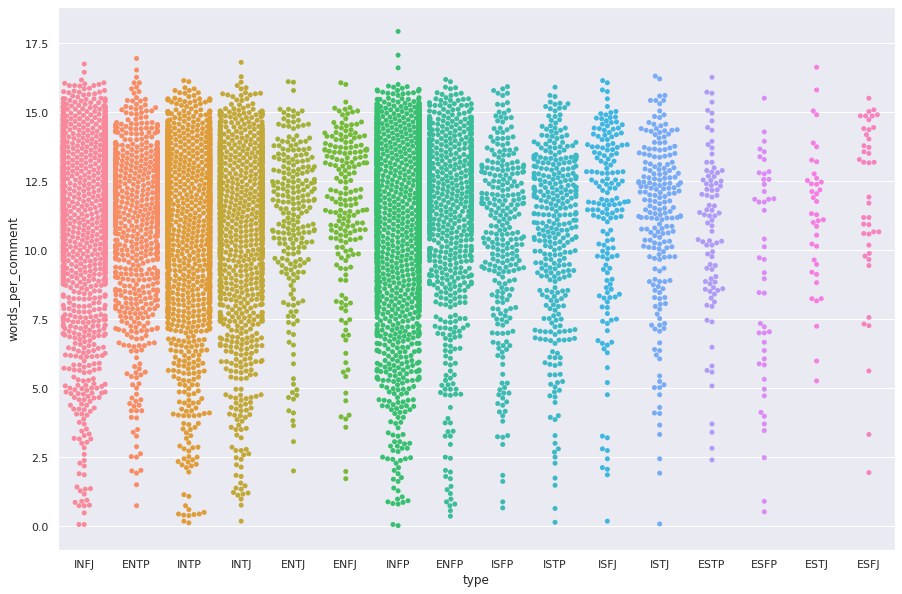

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

In [ ]:
voc_size = 50000
messages=df['posts'].copy()
messages



0       enfp intj moment sportscenter play prankswhat ...
1       i find lack post alarmingsex boring position o...
2       good _ _ _ _ _ of course know blessing cursedo...
3       dear intp enjoy conversation day esoteric gabb...
4       you re firedthat silly misconception approach ...
                              ...                        
8669    ixfp think cat fi dom reason especially websit...
8670    soif thread exist someplace which do heck dele...
8671    so question thing purple pill pick win lottery...
8672    i conflict right come want child honestly mate...
8673    it long personalitycafe change bit good like t...
Name: posts, Length: 8674, dtype: object

In [ ]:

ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)

In [ ]:
oe=[one_hot(words,voc_size) for words in corpus ]

In [ ]:
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)

In [ ]:
# dimension=100
# model = Sequential()
# model.add(Embedding(voc_size,dimension,input_length = sent_length))
# model.add(Dropout(0.25))
# model.add(LSTM(100))
# model.add(Dropout(0.25))
# model.add(Dense(16,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [ ]:
max_features =50000
embedding_dim =64
sequence_length = 250

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, ))                                 

model.add(tf.keras.layers.Conv1D(128,16, activation='relu'))                               

model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(16, activation='sigmoid'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])

In [ ]:

X=np.array(embedded_docs)


In [ ]:

df.type.value_counts()

INFP    1832
INFJ    1469
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:


ros = RandomOverSampler(random_state=42) # fit predictor and target variable
x_rus, y_rus = ros.fit_resample(X, y)


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
callbacks = [
             EarlyStopping( monitor="val_accuracy", patience=2 ),
             mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
             ]

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks = callbacks )

Epoch 1/20
367/367 [==============================] - 175s 469ms/step - loss: 2.1685 - accuracy: 0.3563 - val_loss: 1.0070 - val_accuracy: 0.7194
Epoch 2/20
367/367 [==============================] - 171s 466ms/step - loss: 0.6100 - accuracy: 0.8460 - val_loss: 0.5104 - val_accuracy: 0.8409
Epoch 3/20
367/367 [==============================] - 171s 467ms/step - loss: 0.2292 - accuracy: 0.9573 - val_loss: 0.4869 - val_accuracy: 0.8475
Epoch 4/20
367/367 [==============================] - 170s 463ms/step - loss: 0.1527 - accuracy: 0.9600 - val_loss: 0.4835 - val_accuracy: 0.8410
Epoch 5/20
367/367 [==============================] - 169s 461ms/step - loss: 0.1343 - accuracy: 0.9609 - val_loss: 0.4856 - val_accuracy: 0.8460


In [ ]:
model.save('Prediction.h5')

In [ ]:
len(history.history['val_accuracy']) 

14